<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#date-time-features" data-toc-modified-id="date-time-features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>date time features</a></span></li><li><span><a href="#categorical-features" data-toc-modified-id="categorical-features-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>categorical features</a></span></li><li><span><a href="#Boolean-features" data-toc-modified-id="Boolean-features-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Boolean features</a></span></li><li><span><a href="#Bucketizing-Numerical-Features" data-toc-modified-id="Bucketizing-Numerical-Features-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Bucketizing Numerical Features</a></span></li><li><span><a href="#dummy-variables-for-binned-and-categorical-features" data-toc-modified-id="dummy-variables-for-binned-and-categorical-features-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>dummy variables for binned and categorical features</a></span></li><li><span><a href="#Log-transform-large-numerical-features" data-toc-modified-id="Log-transform-large-numerical-features-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Log transform large numerical features</a></span></li><li><span><a href="#combine-all-features-to-one-column" data-toc-modified-id="combine-all-features-to-one-column-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>combine all features to one column</a></span></li></ul></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#train-test-splitting" data-toc-modified-id="train-test-splitting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>train test splitting</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#model-evaluation" data-toc-modified-id="model-evaluation-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>model evaluation</a></span></li><li><span><a href="#predictions" data-toc-modified-id="predictions-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>predictions</a></span></li><li><span><a href="#metrics" data-toc-modified-id="metrics-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>metrics</a></span></li><li><span><a href="#evaluation-using-ml.evaluation" data-toc-modified-id="evaluation-using-ml.evaluation-9.1.4"><span class="toc-item-num">9.1.4&nbsp;&nbsp;</span>evaluation using ml.evaluation</a></span></li></ul></li><li><span><a href="#Elastic-Net-Regression" data-toc-modified-id="Elastic-Net-Regression-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Elastic Net Regression</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Parameter-tuning" data-toc-modified-id="Parameter-tuning-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Parameter tuning</a></span></li></ul></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Importances</a></span></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.
![](../data/raw/data_description.png)

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
rcParams['figure.figsize'] = 12,8

import os
import time

# random state
random_state=100
np.random.seed=random_state
np.random.set_state=random_state

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)


import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.15.4'), ('pandas', '0.24.2'), ('seaborn', '0.9.0'), ('matplotlib', '2.2.4')]


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import pyspark
from pyspark import SparkConf, SparkContext, SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import udf # @udf("integer") def myfunc(x,y): return x - y
from pyspark.sql import functions as F # stddev format_number date_format, dayofyear, when
from pyspark.sql.types import StructField, StringType, IntegerType, FloatType, StructType, DateType

print([(x.__name__,x.__version__) for x in [np, pd, pyspark]])

spark = pyspark.sql.SparkSession.builder.appName('bhishan').getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc) # spark_df = sqlContext.createDataFrame(pandas_df)
sc.setLogLevel("INFO")

[('numpy', '1.15.4'), ('pandas', '0.24.2'), ('pyspark', '2.4.3')]


In [4]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import OneHotEncoder,OneHotEncoderEstimator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import GBTRegressor

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics

In [5]:
sc

<SparkContext master=local[*] appName=bhishan>

# Load the data

In [6]:
!head  ../data/raw/kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

In [7]:
df = spark.read.csv('../data/raw/kc_house_data.csv', header=True, inferSchema=True).cache()
print('nrows = ', df.count(), 'ncols = ', len(df.columns))
df.limit(5).toPandas()

nrows =  21613 ncols =  21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [9]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# EDA

In [10]:
df.select(['price','sqft_living']).show(5)

+------+-----------+
| price|sqft_living|
+------+-----------+
|221900|       1180|
|538000|       2570|
|180000|        770|
|604000|       1960|
|510000|       1680|
+------+-----------+
only showing top 5 rows



In [11]:
df.select(F.mean('price'), F.max('price')).show()

+-----------+----------+
| avg(price)|max(price)|
+-----------+----------+
|540088.1418|   7700000|
+-----------+----------+



In [12]:
df.select([x(df['sqft_living']) 
           for x in [F.max, F.min ]]).show()

+----------------+----------------+
|max(sqft_living)|min(sqft_living)|
+----------------+----------------+
|           13540|             290|
+----------------+----------------+



In [13]:
df.select('grade').distinct().show()

+-----+
|grade|
+-----+
|   12|
|    1|
|   13|
|    6|
|    3|
|    5|
|    9|
|    4|
|    8|
|    7|
|   10|
|   11|
+-----+



In [14]:
df.groupBy('bedrooms').agg(F.max('price')).show()

+--------+----------+
|bedrooms|max(price)|
+--------+----------+
|       1|   1247000|
|       6|   7700000|
|       3|   3800000|
|       5|   7062500|
|       9|   1400000|
|       4|   4489000|
|       8|   3300000|
|       7|   3200000|
|      10|   1148000|
|      11|    520000|
|      33|    640000|
|       2|   3278000|
|       0|   1295650|
+--------+----------+



In [15]:
df.filter(df['price']>10000).agg({'grade': 'count'}).show()

+------------+
|count(grade)|
+------------+
|       21613|
+------------+



In [16]:
df.select('date').filter(df['date'].like('2014%')).show(2)

+---------------+
|           date|
+---------------+
|20141013T000000|
|20141209T000000|
+---------------+
only showing top 2 rows



In [17]:
df.select('id', 'bedrooms').filter(df['bedrooms'].isin(1,2)).show(2)

+----------+--------+
|        id|bedrooms|
+----------+--------+
|5631500400|       2|
|9212900260|       2|
+----------+--------+
only showing top 2 rows



In [18]:
view_grp =  df.groupBy("view").count().sort("view", ascending=False)

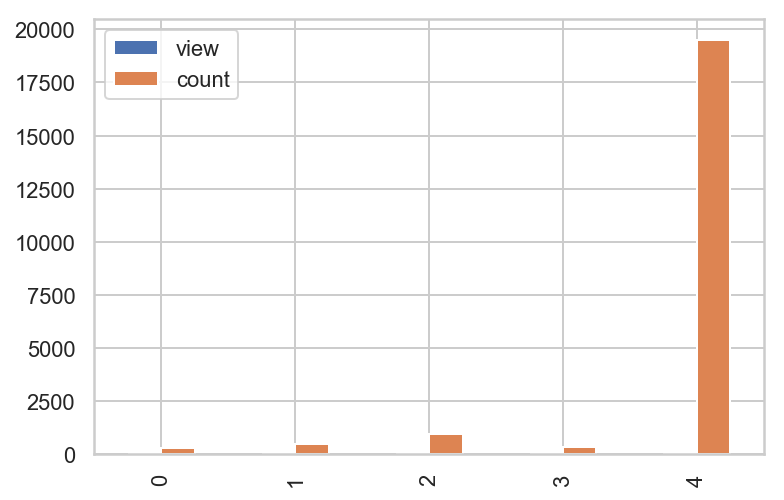

In [19]:
view_grp.toPandas().plot.bar()

In [20]:
df.drop('date').describe().toPandas().set_index('summary').astype(float).round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
summary,,,,,,,,,,,,,,,,,,,,
count,2.161300e+04,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4.580302e+09,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
stddev,2.876566e+09,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1.000102e+06,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


# Feature Engineering

## date time features

In [21]:
df = df.withColumn('yr_sales', df['date'].substr(1, 4).cast(IntegerType()))
df.select('date','yr_sales').show(2)

+---------------+--------+
|           date|yr_sales|
+---------------+--------+
|20141013T000000|    2014|
|20141209T000000|    2014|
+---------------+--------+
only showing top 2 rows



In [22]:
df = df.withColumn('age', df['yr_sales'] - df['yr_built'])
df.select('yr_sales','yr_built','age').show(5)

+--------+--------+---+
|yr_sales|yr_built|age|
+--------+--------+---+
|    2014|    1955| 59|
|    2014|    1951| 63|
|    2015|    1933| 82|
|    2014|    1965| 49|
|    2015|    1987| 28|
+--------+--------+---+
only showing top 5 rows



In [23]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             21613|
|   mean| 43.31781797991949|
| stddev|29.375492803877584|
|    min|                -1|
|    max|               115|
+-------+------------------+



In [24]:
df.limit(5).toPandas()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [25]:
# I can see some negative numbers.
df.select('id', 'yr_sales', 'yr_built', 'age').filter(df['age'] == -1).show(5)

+----------+--------+--------+---+
|        id|yr_sales|yr_built|age|
+----------+--------+--------+---+
|1832100030|    2014|    2015| -1|
|3076500830|    2014|    2015| -1|
|9520900210|    2014|    2015| -1|
|1250200495|    2014|    2015| -1|
|2770601530|    2014|    2015| -1|
+----------+--------+--------+---+
only showing top 5 rows



In [26]:
# some houses are sold before they are constructed.
# df.filter(df['age'] == -1).toPandas()


In [27]:
df.filter(df['age'] == -1).count()

12

## categorical features

In [28]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age']


In [29]:
cols_cat = ['bedrooms'] 

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index")
            for column in cols_cat]

encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers]
)

assembler = VectorAssembler(
    inputCols=encoder.getOutputCols(),
    outputCol="features_encoded_vec"
)

pipeline = Pipeline(stages=indexers + [encoder, assembler])
df = pipeline.fit(df).transform(df)

df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)
 |-- yr_sales: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bedrooms_index: double (nullable = false)
 |-- bedrooms_index_

## Boolean features

In [30]:
df = df.withColumn('basement_bool', (col('sqft_basement') > 0).cast(IntegerType()) )
df.select('sqft_basement','basement_bool').show(2)

+-------------+-------------+
|sqft_basement|basement_bool|
+-------------+-------------+
|            0|            0|
|          400|            1|
+-------------+-------------+
only showing top 2 rows



## Bucketizing Numerical Features

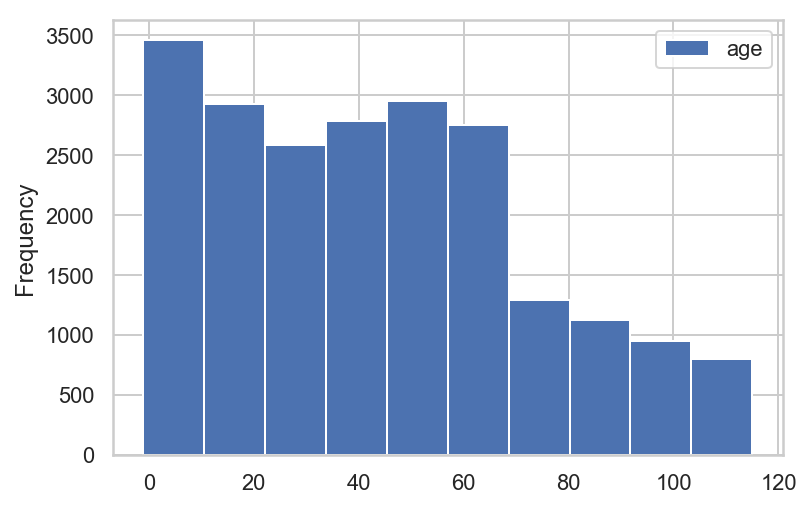

In [31]:
# sampling is discouraged in pyspark, we can check some top rows
# but this dataset is small and even pandas can handle this one.

df.select('age').toPandas().plot.hist()

In [32]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             21613|
|   mean| 43.31781797991949|
| stddev|29.375492803877584|
|    min|                -1|
|    max|               115|
+-------+------------------+



In [33]:
# there is no easy way to get max or min in pyspark
age_min = df.agg({"age": "min"}).collect()[0][0]
age_max = df.agg({"age": "max"}).collect()[0][0] 

age_min, age_max

(-1, 115)

In [34]:
splits = np.linspace(age_min, age_max+1, 10)
splits

array([ -1.,  12.,  25.,  38.,  51.,  64.,  77.,  90., 103., 116.])

In [35]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=splits,inputCol="age", outputCol="age_cat")

df = bucketizer.setHandleInvalid("keep").transform(df)

df.select('age','age_cat').show(5)

+---+-------+
|age|age_cat|
+---+-------+
| 59|    4.0|
| 63|    4.0|
| 82|    6.0|
| 49|    3.0|
| 28|    2.0|
+---+-------+
only showing top 5 rows



## dummy variables for binned and categorical features

In [36]:
cols_cat = ['age_cat'] 

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index")
            for column in cols_cat]

encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers]
)

assembler = VectorAssembler(
    inputCols=encoder.getOutputCols(),
    outputCol="age_cat_vec"
)

pipeline = Pipeline(stages=indexers + [encoder, assembler])
df = pipeline.fit(df).transform(df)

df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)
 |-- yr_sales: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bedrooms_index: double (nullable = false)
 |-- bedrooms_index_

In [37]:
df.select('age','age_cat','age_cat_index','age_cat_index_encoded').show(5)

+---+-------+-------------+---------------------+
|age|age_cat|age_cat_index|age_cat_index_encoded|
+---+-------+-------------+---------------------+
| 59|    4.0|          2.0|        (8,[2],[1.0])|
| 63|    4.0|          2.0|        (8,[2],[1.0])|
| 82|    6.0|          7.0|        (8,[7],[1.0])|
| 49|    3.0|          4.0|        (8,[4],[1.0])|
| 28|    2.0|          1.0|        (8,[1],[1.0])|
+---+-------+-------------+---------------------+
only showing top 5 rows



## Log transform large numerical features

In [38]:
df.select('sqft_living').withColumn('log1p_sqft_living', F.log1p("sqft_living")).show(2)

+-----------+-----------------+
|sqft_living|log1p_sqft_living|
+-----------+-----------------+
|       1180|7.074116816197362|
|       2570|7.852050207265889|
+-----------+-----------------+
only showing top 2 rows



In [39]:
np.log1p(1180)

7.074116816197362

In [40]:
cols_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
            'sqft_basement', 'sqft_living15', 'sqft_lot15']

for c in cols_log:
    df = df.withColumn('log1p_' + c , F.log1p(c))

In [41]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15']


In [42]:
df.select(['log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15']).show(2)

+-------------------+-------------------+-----------------+
|log1p_sqft_basement|log1p_sqft_living15| log1p_sqft_lot15|
+-------------------+-------------------+-----------------+
|                0.0|  7.201170883281678|8.639587799629844|
|  5.993961427306569|   7.43307534889858|8.941152882160566|
+-------------------+-------------------+-----------------+
only showing top 2 rows



In [43]:
cols_after_log = ['log1p_' + i for i in cols_log]
cols_after_log

['log1p_price',
 'log1p_sqft_living',
 'log1p_sqft_lot',
 'log1p_sqft_above',
 'log1p_sqft_basement',
 'log1p_sqft_living15',
 'log1p_sqft_lot15']

## combine all features to one column

In [44]:
print(df.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15']


In [45]:
selected_features = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [46]:
assembler = VectorAssembler(
    inputCols= selected_features,
    outputCol='features'
)

df = assembler.transform(df)

df.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)
 |-- yr_sales: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bedrooms_index: double (nullable = false)
 |-- bedrooms_index_

# Feature Scaling

In [47]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
df = scaler.fit(df).transform(df)

df.select(["features","features_scaled"]).limit(2).toPandas()

,features,features_scaled
0,"[3.0, 1.0, 1180.0, 5650.0, 1.0, 0.0, 0.0, 3.0, 7.0, 1180.0, 0.0, 1955.0, 0.0, 98178.0, 47.5112, -122.257, 1340.0, 5650.0]","[3.2255919977909313, 1.2984261719459003, 1.2847859930826446, 0.13640584805273173, 1.8518899351372502, 0.0, 0.0, 4.610114570954257, 5.955121741589817, 1.424964203022636, 0.0, 66.556792234737, 0.0, ..."
1,"[3.0, 2.25, 2570.0, 7242.0, 2.0, 0.0, 0.0, 3.0, 7.0, 2170.0, 400.0, 1951.0, 1991.0, 98125.0, 47.721, -122.319, 1690.0, 7639.0]","[3.2255919977909313, 2.9214588868782756, 2.798220340866438, 0.17484091178723596, 3.7037798702745004, 0.0, 0.0, 4.610114570954257, 5.955121741589817, 2.620485017422983, 0.9038015283918897, 66.42061..."


# train test splitting

In [48]:
train, test = df.randomSplit([0.8,0.2], seed=random_state)
train.count(), test.count()

(17323, 4290)

# Modelling

## Linear Regression

In [49]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features_scaled',
                      labelCol='price',
                     predictionCol='prediction',
                     maxIter=10).fit(df)

### model evaluation

In [50]:
def show_method_attributes(method, ncols=2):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [I for I in dir(method) if I[0].islower()]
    x = [I for I in x if I not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [51]:
show_method_attributes(lr,7)

,0,1,2,3,4,5,6
0,aggregationDepth,explainParam,getParam,isSet,params,scale,tol
1,coefficients,explainParams,hasDefault,labelCol,predictionCol,set,transform
2,copy,extractParamMap,hasParam,load,read,solver,uid
3,elasticNetParam,featuresCol,hasSummary,loss,regParam,standardization,weightCol
4,epsilon,fitIntercept,intercept,maxIter,save,summary,write
5,evaluate,getOrDefault,isDefined,numFeatures,,,


In [52]:
lr.coefficients

DenseVector([-33265.0953, 31687.8075, 6008989.6808, 5326.5894, 3612.2834, 50436.1052, 40515.9324, 17170.2772, 112715.2636, -5267793.1233, -2829159.902, -76964.894, 7958.3034, -31162.3941, 83519.0309, -30240.0468, 14860.2427, -10447.7218])

In [53]:
lr.intercept

6690330.8435488995

In [54]:
df_coeff = pd.DataFrame({"Feature": ["Intercept"] + selected_features,
  "Co-efficients": np.insert(lr.coefficients.toArray(), 0, lr.intercept)})


df_coeff

,Feature,Co-efficients
0,Intercept,6.690331e+06
1,bedrooms,-3.326510e+04
2,bathrooms,3.168781e+04
3,sqft_living,6.008990e+06
4,sqft_lot,5.326589e+03
5,floors,3.612283e+03
6,waterfront,5.043611e+04
7,view,4.051593e+04
8,condition,1.717028e+04
9,grade,1.127153e+05


### predictions

In [55]:
preds = lr.transform(test)
preds.select('price', 'prediction').show(5)

+------+------------------+
| price|        prediction|
+------+------------------+
|235000|225548.18837336078|
|178000|293933.70595353097|
|487000| 639513.5238347957|
|281000|114608.27346567344|
|465000| 453320.0125229405|
+------+------------------+
only showing top 5 rows



In [56]:
preds_and_labels = preds.select(['prediction','price'])
preds_and_labels.show(5)

+------------------+------+
|        prediction| price|
+------------------+------+
|225548.18837336078|235000|
|293933.70595353097|178000|
| 639513.5238347957|487000|
|114608.27346567344|281000|
| 453320.0125229405|465000|
+------------------+------+
only showing top 5 rows



### metrics

In [57]:
show_method_attributes(lr.summary,5)

,0,1,2,3,4
0,coefficientStandardErrors,featuresCol,numInstances,predictions,rootMeanSquaredError
1,degreesOfFreedom,labelCol,objectiveHistory,r2,tValues
2,devianceResiduals,meanAbsoluteError,pValues,r2adj,totalIterations
3,explainedVariance,meanSquaredError,predictionCol,residuals,


In [58]:
print([i for i in dir(lr.summary) if i[0].islower()])

['coefficientStandardErrors', 'degreesOfFreedom', 'devianceResiduals', 'explainedVariance', 'featuresCol', 'labelCol', 'meanAbsoluteError', 'meanSquaredError', 'numInstances', 'objectiveHistory', 'pValues', 'predictionCol', 'predictions', 'r2', 'r2adj', 'residuals', 'rootMeanSquaredError', 'tValues', 'totalIterations']


In [59]:
metrics = [ 'explainedVariance', 'meanAbsoluteError',
           'r2', 'r2adj',  'rootMeanSquaredError']

metrics_values = [getattr(lr.summary,m) for m in metrics]

df_metrics = pd.DataFrame({'metric': metrics,
                          'values': metrics_values})

df_metrics

,metric,values
0,explainedVariance,9.430923e+10
1,meanAbsoluteError,1.259226e+05
2,r2,6.997472e-01
3,r2adj,6.994969e-01
4,rootMeanSquaredError,2.011639e+05


### evaluation using ml.evaluation

In [60]:
from pyspark.ml.evaluation import RegressionEvaluator


metrics = ['rmse','mae','r2']
metrics_values = [ RegressionEvaluator(predictionCol="prediction",
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,193679.667761
1,mae,124786.249732
2,r2,0.717238


## Elastic Net Regression

In [61]:
pred_col = 'prediction_elasticnet'

model = (LinearRegression(featuresCol='features_scaled',
                       labelCol="price",
                       predictionCol=pred_col,
                       maxIter=10,
                       regParam=0.3,
                       elasticNetParam=0.8,
                       standardization=False)
     )

model = model.fit(train)
preds = model.transform(test)
preds_and_labels = preds.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,193975.893391
1,mae,125668.434025
2,r2,0.716372


## Decision Tree Regressor

In [62]:
from pyspark.ml.regression import DecisionTreeRegressor

pred_col = 'prediction_dtree'
model = DecisionTreeRegressor(featuresCol='features_scaled',
                       labelCol="price",
                       predictionCol=pred_col,
                       seed=random_state
                       )

model = model.fit(train)
preds = model.transform(test)
preds_and_labels = preds.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,184587.818978
1,mae,113562.302351
2,r2,0.743162


## Random Forest Regressor

In [63]:
from pyspark.ml.regression import RandomForestRegressor

pred_col = 'prediction_rf'
model = RandomForestRegressor(featuresCol='features_scaled',
                       labelCol="price",
                       predictionCol=pred_col,
                       seed=random_state
                       )

model = model.fit(train)
preds_rf = model.transform(test)
preds_and_labels = preds_rf.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,171490.447891
1,mae,105460.153789
2,r2,0.778316


## Parameter tuning

In [64]:
print(train.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15', 'features', 'features_scaled']


In [75]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
import time

t0 = time.time()

model_rf = RandomForestRegressor(labelCol = "price", numTrees = 50, seed=random_state)

grid_depths = [10,20]
paramGrid = ParamGridBuilder()\
   .addGrid(model_rf.maxDepth, grid_depths)\
   .addGrid(model_rf.minInstancesPerNode, grid_depths)\
   .build()

pipeline = Pipeline(stages = [model_rf])

evaluator = RegressionEvaluator(labelCol = "price",
                                predictionCol = "prediction",
                                metricName = "r2") 

crossval = CrossValidator(estimator = pipeline,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator,
                          seed = random_state,
                          parallelism=50, # number of threads to use
                          numFolds = 5)


model_cv = crossval.fit(train)

t1 = time.time() - t0
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(t1,60)))
# Time taken: 5 min 40 secs with parallelism 1  (5 folds, numtree = 50)
# 3min 22 sec with 10 threads
# 3min 18 sec with 50 threads

Time taken: 3 min 18 secs


In [70]:
show_method_attributes(model_cv,7)

,0,1,2,3,4,5,6
0,avgMetrics,evaluator,getEstimatorParamMaps,hasDefault,params,setEstimator,subModels
1,bestModel,explainParam,getEvaluator,hasParam,read,setEstimatorParamMaps,transform
2,copy,explainParams,getOrDefault,isDefined,save,setEvaluator,uid
3,estimator,extractParamMap,getParam,isSet,seed,setSeed,write
4,estimatorParamMaps,getEstimator,getSeed,load,set,,


In [68]:
prediction = model_cv.transform(test)

In [69]:
print(prediction.columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age', 'bedrooms_index', 'bedrooms_index_encoded', 'features_encoded_vec', 'basement_bool', 'age_cat', 'age_cat_index', 'age_cat_index_encoded', 'age_cat_vec', 'log1p_price', 'log1p_sqft_living', 'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement', 'log1p_sqft_living15', 'log1p_sqft_lot15', 'features', 'features_scaled', 'prediction']


In [66]:
evaluator.evaluate(model_cv.transform(test)) # gives r2 for test data

0.8735215164466693

In [67]:
model_cv.bestModel.stages

[RandomForestRegressionModel (uid=RandomForestRegressor_dab36ab4cd8c) with 50 trees]

In [71]:
model_cv.params

[Param(parent='CrossValidatorModel_1419a6341a46', name='estimator', doc='estimator to be cross-validated'),
 Param(parent='CrossValidatorModel_1419a6341a46', name='estimatorParamMaps', doc='estimator param maps'),
 Param(parent='CrossValidatorModel_1419a6341a46', name='evaluator', doc='evaluator used to select hyper-parameters that maximize the validator metric'),
 Param(parent='CrossValidatorModel_1419a6341a46', name='seed', doc='random seed.')]

In [72]:
pred_col = 'prediction'
preds_and_labels = prediction.select([pred_col,'price'])

metrics = ['rmse','mae','r2']

metrics_values = [ RegressionEvaluator(predictionCol=pred_col,
                                labelCol='price',
                                metricName=m).evaluate(preds_and_labels)
                 for m in metrics ]

df_metrics = pd.DataFrame({'metric': metrics,
                          'value': metrics_values})

df_metrics

,metric,value
0,rmse,129533.341432
1,mae,73218.398650
2,r2,0.873522


# Feature Importances

In [92]:
model_cv.bestModel.stages[-1].featureImportances

SparseVector(18, {0: 0.0038, 1: 0.0559, 2: 0.2632, 3: 0.0098, 4: 0.0025, 5: 0.0252, 6: 0.0269, 7: 0.0036, 8: 0.2335, 9: 0.0397, 10: 0.0133, 11: 0.0343, 12: 0.0022, 13: 0.0189, 14: 0.1467, 15: 0.0558, 16: 0.0534, 17: 0.0114})

In [76]:
prediction.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 0, 'name': 'bedrooms'},
  {'idx': 1, 'name': 'bathrooms'},
  {'idx': 2, 'name': 'sqft_living'},
  {'idx': 3, 'name': 'sqft_lot'},
  {'idx': 4, 'name': 'floors'},
  {'idx': 5, 'name': 'waterfront'},
  {'idx': 6, 'name': 'view'},
  {'idx': 7, 'name': 'condition'},
  {'idx': 8, 'name': 'grade'},
  {'idx': 9, 'name': 'sqft_above'},
  {'idx': 10, 'name': 'sqft_basement'},
  {'idx': 11, 'name': 'yr_built'},
  {'idx': 12, 'name': 'yr_renovated'},
  {'idx': 13, 'name': 'zipcode'},
  {'idx': 14, 'name': 'lat'},
  {'idx': 15, 'name': 'long'},
  {'idx': 16, 'name': 'sqft_living15'},
  {'idx': 17, 'name': 'sqft_lot15'}]}

In [90]:
# https://stackoverflow.com/questions/42935914/how-to-map-features-from-the-output-of-a-vectorassembler-back-to-the-column-name
def get_feature_importance_df(model_cv, dataset, featuresCol):
    feat_imp = model_cv.bestModel.stages[-1].featureImportances
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract += dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
        
    pandas_df_feat_imp = pd.DataFrame(list_extract)
    pandas_df_feat_imp['importance'] = pandas_df_feat_imp['idx'].apply(lambda x: feat_imp[x])
    pandas_df_feat_imp = pandas_df_feat_imp.sort_values('importance', ascending = False)
    
    return pandas_df_feat_imp

In [91]:
pandas_df_feat_imp = get_feature_importance_df(model_cv, prediction, "features")
pandas_df_feat_imp.style.background_gradient(subset=['importance'])

,idx,name,importance
2,2,sqft_living,0.26316
8,8,grade,0.233472
14,14,lat,0.146669
1,1,bathrooms,0.0559069
15,15,long,0.0558219
16,16,sqft_living15,0.0533512
9,9,sqft_above,0.0396954
11,11,yr_built,0.0342701
6,6,view,0.0269099
5,5,waterfront,0.0251735
